<a href="https://colab.research.google.com/github/emmad225/BIACoursework/blob/main/duffyep_lab5_ML_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CSCI 3397/PSYC 3317] Lab 5: Machine Learning Overview

**Posted:** Friday, February 28, 2024

**Due:** Wednesday, March 13, 2024

__Total Points__: 14 pts

__Submission__: please rename the .ipynb file as __\<your_username\>_lab5a.ipynb__ before you submit it to canvas. Example: weidf_lab5.ipynb.

# <b>1. Linear regression</b>

In [ ]:
## utility functions

# dataset split
def data_split(N, ratio=[6,2,2]):
    # generate a shuffle array
    shuffle_idx = np.arange(N)
    np.random.shuffle(shuffle_idx)
    # divide into train-val-test by the ratio
    data_split = (np.cumsum(ratio)/float(sum(ratio))*N).astype(int)
    out_idx = [None] * len(ratio)
    out_idx[0] = shuffle_idx[:data_split[0]]
    for i in range(1,len(ratio)):
        out_idx[i] = shuffle_idx[data_split[i-1] : data_split[i]]
    return out_idx

def MSE(y,y_hat):
    # Lec. 9, page 19
    return ((y-y_hat)**2).mean()

## 1.1 Dataset Generation

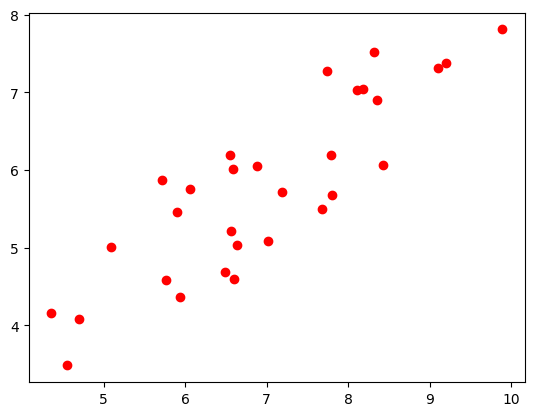

In [ ]:
# data generation
import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# gt polynomial: y = 0.73x + 0.58
theta_gt = [0.58, 0.73]  # theta_0,theta_1
num_pt = 50

X = np.random.uniform(4, 10, num_pt).reshape(-1,1)
Y = theta_gt[0] + theta_gt[1] * X + 0.5 *np.random.normal(0, 1, num_pt).reshape(-1,1)

# for visualization
XX = np.linspace(4,10,100).reshape(-1,1)

train_idx, val_idx, test_idx = data_split(len(Y))

X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

plt.plot(X_train,Y_train,'ro')

## 1.2 Use 1-dim formula

Lec 17, page 20

gt theta [0.58, 0.73]
estimated theta (1-dim formula) [0.845203436096269, 0.7064636030784668]
MSE error 0.3195421742268945


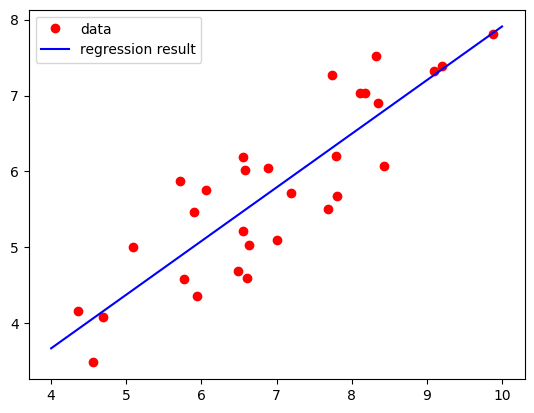

In [ ]:
theta_1 = (X_train*Y_train).mean()-X_train.mean()*Y_train.mean()
theta_1 = theta_1/ ((X_train**2).mean()-X_train.mean()**2)
theta_0 = Y_train.mean()-theta_1*X_train.mean()

plt.plot(X_train,Y_train,'ro')
plt.plot(XX,XX*theta_1+theta_0,'b-')
plt.legend(['data', 'regression result'])

print('gt theta', theta_gt)
print('estimated theta (1-dim formula)', [theta_0,theta_1])


# evaluation on the training data
Y_train_hat = X_train*theta_1+theta_0
print('MSE error', MSE(Y_train, Y_train_hat))

## 1.3 Use N-dim formula

Lec 17, page 21

In [ ]:
X_train_aug = np.hstack([np.ones([len(X_train),1]),X_train])

theta_nd = np.linalg.solve(np.matmul(X_train_aug.T, X_train_aug), np.matmul(X_train_aug.T, Y_train))
print('estimated theta (N-dim formula)', theta_nd)

# evaluation on the training data
Y_train_hat = X_train*theta_nd[1]+theta_nd[0]
print('MSE error', MSE(Y_train, Y_train_hat))

estimated theta (N-dim formula) [[0.84520344]
 [0.7064636 ]]
MSE error 0.3195421742268945


# <b>2. Polynomial regression</b>
(Linear regression + polynomial feature)

## 2.1 Data generation

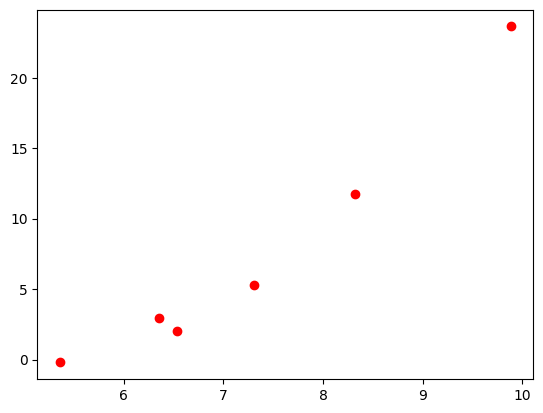

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# gt polynomial: y = x^2 -10x +25
num_pt = 10

X2 = np.random.uniform(4, 10, num_pt).reshape(-1,1)
theta_gt2 = [25,-10,1]
Y2 = theta_gt2[0] + theta_gt2[1]*X2 +theta_gt2[2]*X2**2 + 0.5 *np.random.normal(0, 1, num_pt).reshape(-1,1)

# for visualization
XX2 = np.linspace(4,10,100).reshape(-1,1)

train_idx2, val_idx2, test_idx2 = data_split(len(Y2))

X_train2, Y_train2 = X2[train_idx2], Y2[train_idx2]
X_val2, Y_val2 = X2[val_idx2], Y2[val_idx2]
X_test2, Y_test2 = X2[test_idx2], Y2[test_idx2]

plt.plot(X_train2,Y_train2,'ro')

## 2.1 Use N-dim formula

Lec 18, page 18

In [ ]:
X_train2_aug = np.hstack([np.ones([len(X_train2),1]),X_train2,X_train2**2])

theta_nd2 = np.linalg.solve(np.matmul(X_train2_aug.T, X_train2_aug), np.matmul(X_train2_aug.T, Y_train2))
print('gt theta', theta_gt2)
print('estimated theta (N-dim formula)',theta_nd2)

# evaluation on the training data
Y_train2_hat = X_train2 * X_train2 * theta_nd2[2] + X_train2 * theta_nd2[1]+theta_nd2[0]
print('MSE error', MSE(Y_train2, Y_train2_hat))

gt theta [25, -10, 1]
estimated theta (N-dim formula) [[18.02918709]
 [-8.073593  ]
 [ 0.87484728]]
MSE error 0.2468921411600269


# <b>3. Unsupervised learning </b>



## 3. Data: [[MedMNIST]](https://medmnist.com/)

In [ ]:
import os
if not os.path.exists('pathmnist.npz'):
  # download may take 8 min
  ! wget https://zenodo.org/record/5208230/files/pathmnist.npz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tensorTo2D(tensor):
    # only keep the first dimension: image index
    # reshape the rest dimensions into one dimension
    return tensor.reshape(tensor.shape[0], -1)

data = np.load('pathmnist.npz')
X_train = data['train_images'][::10]
Y_train = data['train_labels'][::10]
X_test = data['test_images'][::10]
Y_test = data['test_labels'][::10]

# ML assumes 2D input: N x feature input
X_train_2d = tensorTo2D(X_train)
X_test_2d = tensorTo2D(X_test)

num_label = Y_train.max() + 1

print('Train data size', X_train.shape)
print('Test data size', X_test.shape)
ui, uc = np.unique(Y_train, return_counts=True)
print('#label', num_label)
print('Train label counts', uc)

Train data size (9000, 28, 28, 3)
Test data size (718, 28, 28, 3)
#label 9
Train label counts [ 879  954 1040 1044  821 1245  775  927 1315]


<ipython-input-64-11e75205966b>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('class %d' % Y_train[i])


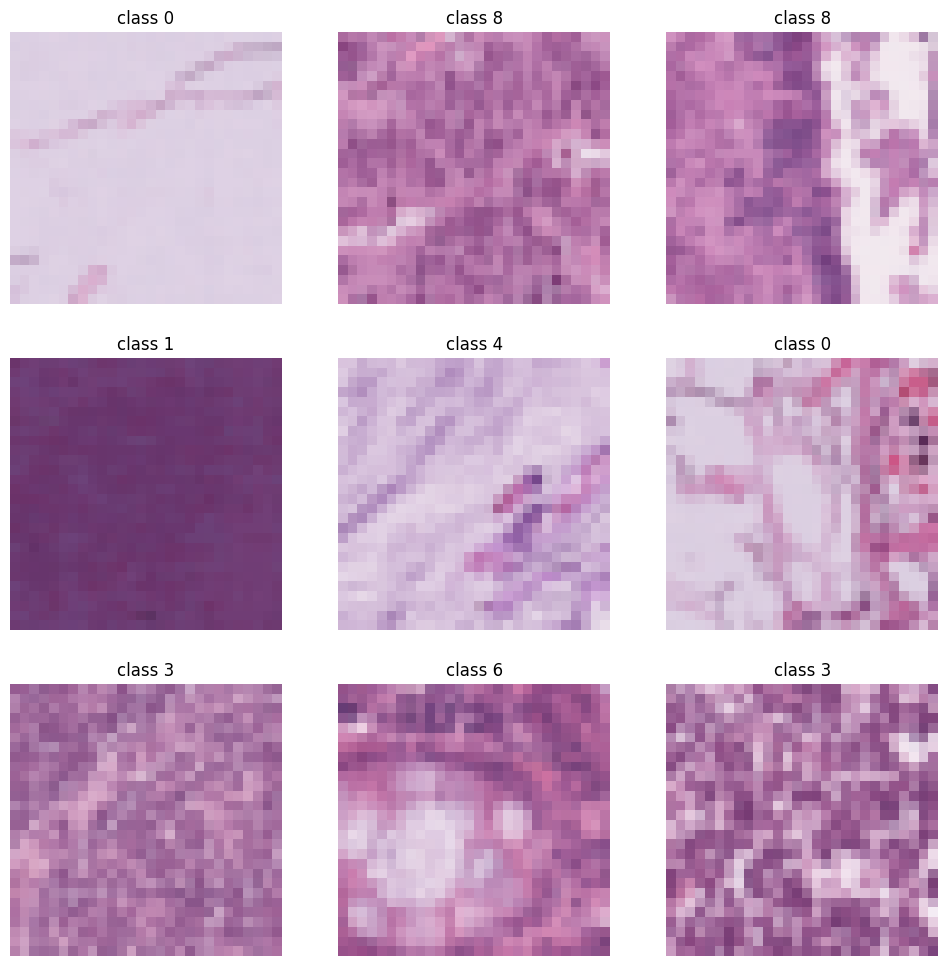

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title('class %d' % Y_train[i])

## 3.1 Clustering
Kmeans clustering method:
[[Sklearn documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
[[Explanation]](https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/)

Lec 17, Page 6-10

In [ ]:
# model training
from sklearn.cluster import KMeans
num_cluster = 5
max_iter = 10000
kmeans = KMeans(n_clusters = num_cluster, max_iter=max_iter)
cluster_labels = kmeans.fit_predict(X_train_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


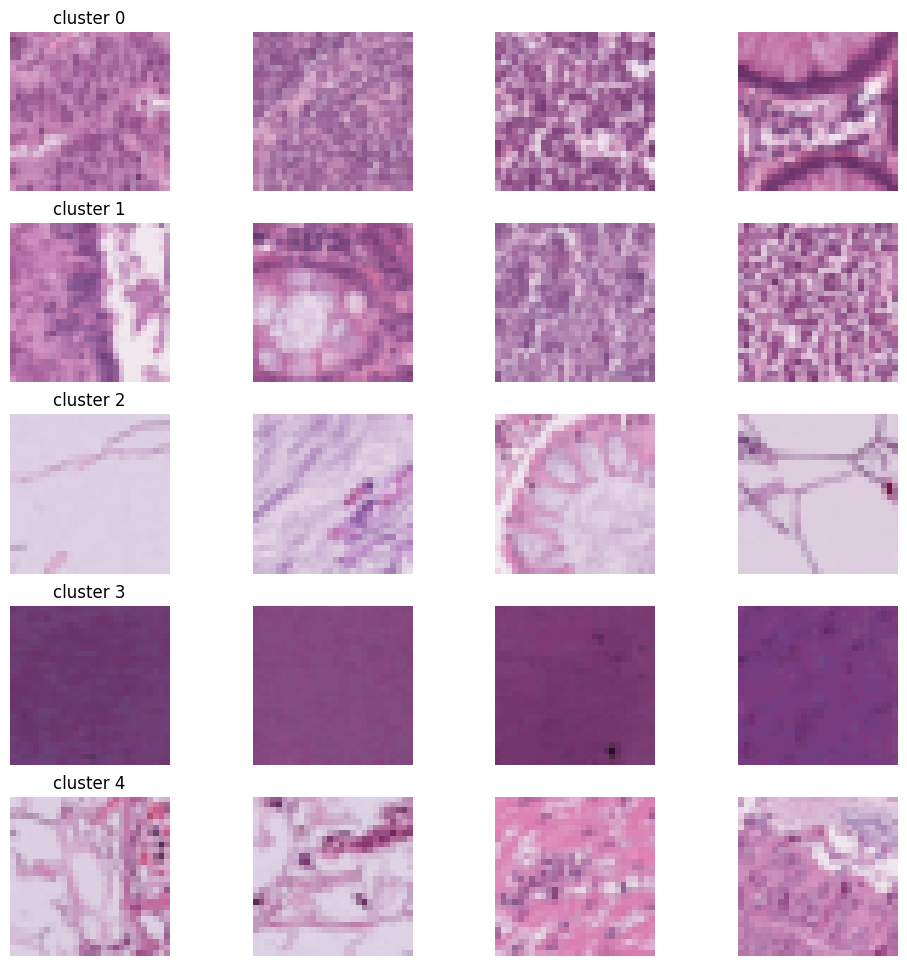

In [ ]:
# visualization
num_disp = 4
plt.figure(figsize=(12, 12))
for i in range(num_cluster):
    index = np.where(cluster_labels==i)[0]
    for j in range(num_disp):
        plt.subplot(num_cluster, num_disp, i*num_disp+j+1)
        plt.imshow(X_train[index[j]])
        plt.axis('off')
        if j == 0:
            plt.title('cluster %d' % i)

## 3.2 Dimension Reduction

Principle component analysis (PCA) method:
[[Sklearn documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[[Example]](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)
[[Explanation]](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

Lec. 17, Page 11-14

In [ ]:
# model training
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_2d)

# inference
X_train_pca2 = pca.transform(X_train_2d)

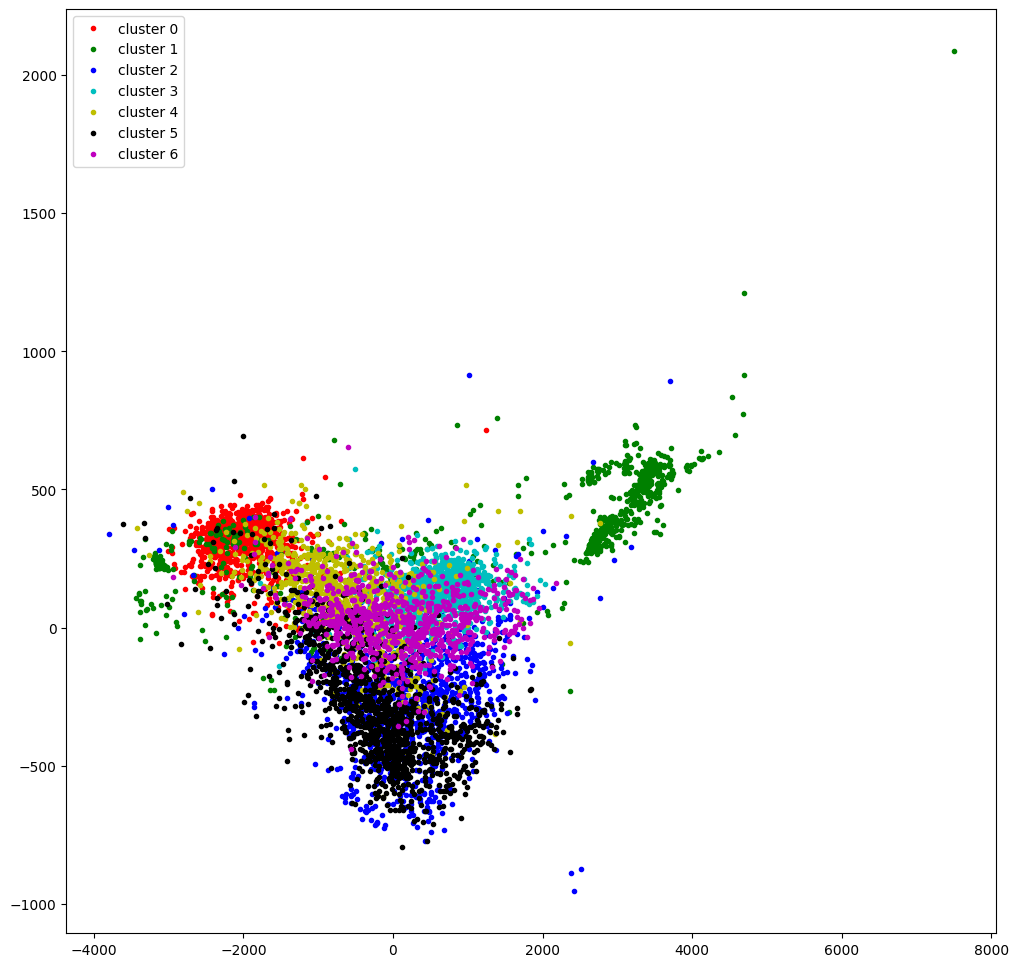

In [ ]:
# visualization
cc='rgbcykm'
plt.figure(figsize=(12, 12))
for label in range(len(cc)):
    index = Y_train[:,0]==label
    plt.plot(X_train_pca2[index,0], X_train_pca2[index,1], cc[label]+'.')

plt.legend(['cluster %d'%x for x in range(len(cc))])

# [14 pts] Exercise

## (1) [3 pts] Polynomial regressor for any order of K

- [2 pt] Build a function to do polynomial regression with the input order K (e.g., $\sum_{i=0}^{k}\theta_ix^i$) and return the estimated theta
- [1 pt] Sanity check: for K=2, print the MSE error for the train data (X_train2, Y_train2) in section 2 and check if the MSE values agree.

In [ ]:
# hint: create the feature in the beginning and use for-loop to fill in each feature dimension
import numpy as np
def train_PR(x,y,k):

  X = np.ones((len(x), k + 1))
  for i in range(1, k + 1):
      X[:, i] = np.squeeze(x) ** i

  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

theta_sanity = train_PR(X_train2, Y_train2, 2)
Y_sanity2 = X_train2 * X_train2 * theta_sanity[2] + X_train2 * theta_sanity[1] + theta_sanity[0]
print('sanity check MSE:', MSE(Y_train2, Y_sanity2))
print('Yes, MSE values agree; MSE is 0.246892141160028 for section 2 and my function.')

sanity check MSE: 0.24689214116002678
Yes, MSE values agree; MSE is 0.246892141160028 for section 2 and my function.


## (2) [5 pts] Model selection
Let `Ks=np.arange(1,11)`
- (a) [1 pt] For each K value, train a polynomial regression model with order=K, evaluate its MSE on the training data.
- (b) [1 pt] Draw a line-plot of the training MSE (`plt.plot(x,y,'-')`) and answer "which K shall we choose if the goal is to minimize the training error"
- (c) [1 pt] Evaluate the trained models (different K values) above on the validation data and answer "which K shall we choose if the goal is to minimize the validation error"
- (d) [1 pt] Repeat (c) on the test data as the "final/real-world" evaluation.
- (e) [1 pt] Which model selection criteria is better: minimize training error or validation error? Briefly explain why.

Lec. 18, slide 30

K = 1, MSE = 3.508503196064179
K = 2, MSE = 0.24689214116002678
K = 3, MSE = 0.24557934200236228
K = 4, MSE = 0.1298906407260309
K = 5, MSE = 6.243973876845447e-06
K = 6, MSE = 33.49303295722142
K = 7, MSE = 95.17406386370205
K = 8, MSE = 674.8913936391458
K = 9, MSE = 739.0952367760377
K = 10, MSE = 580.5592988841187


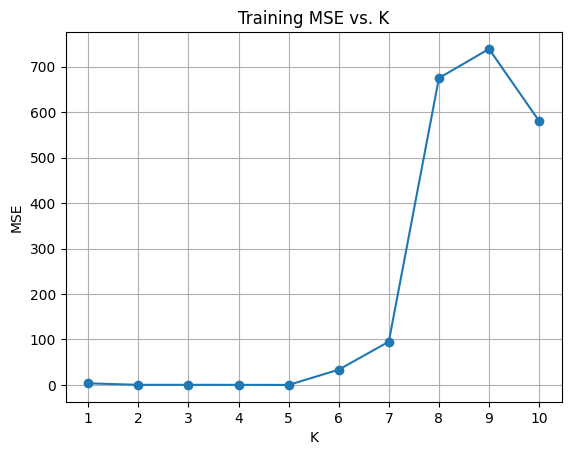

K = 1, Validation MSE = 41.21067343720193
K = 2, Validation MSE = 34.25765237177017
K = 3, Validation MSE = 34.35190837671971
K = 4, Validation MSE = 36.631415133300045
K = 5, Validation MSE = 10.08081626915067
K = 6, Validation MSE = 73.9991938629662
K = 7, Validation MSE = 77.57631705656513
K = 8, Validation MSE = 368.2500940681239
K = 9, Validation MSE = 445.66382471549576
K = 10, Validation MSE = 715.4700309003686


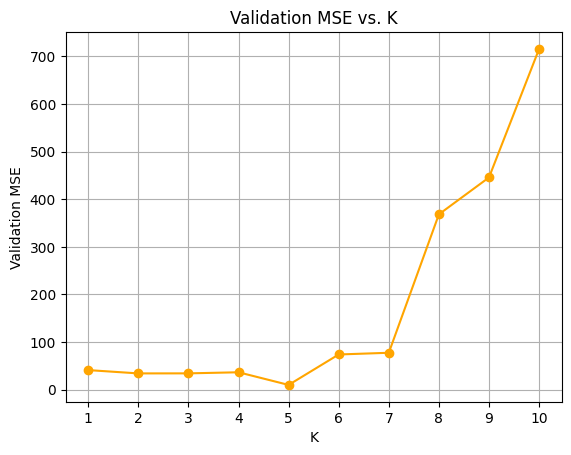

K = 1, Test MSE = 500.0937979528578
K = 2, Test MSE = 93.64038035056471
K = 3, Test MSE = 98.37821180501898
K = 4, Test MSE = 37546.93955642957
K = 5, Test MSE = 44991845.884453915
K = 6, Test MSE = 18944293.556793448
K = 7, Test MSE = 15216018.47908336
K = 8, Test MSE = 3758767.541154232
K = 9, Test MSE = 2937678.074103952
K = 10, Test MSE = 4161838.5680836006


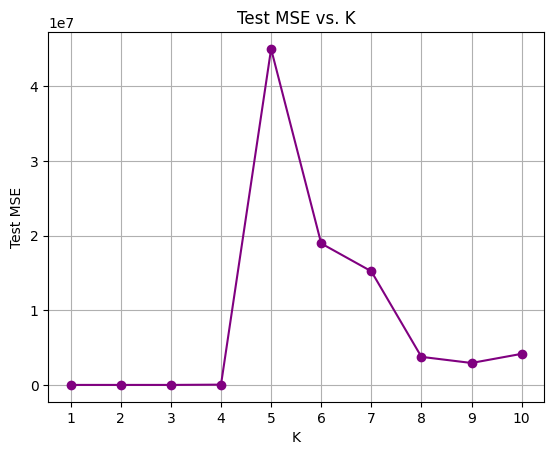

In [ ]:
## (a) train poly-K model (save the model parameter in a list) and print MSE
#Recieved help from peer on using/creating predict function
def predict(X, theta, degree):
  x_pow = np.array([X ** i for i in range(degree+1)]).T
  return np.dot(x_pow, theta)

mse_train_list = []
theta_list = []

Ks = np.arange(1, 11)

for k in Ks:
    theta = train_PR(X_train2, Y_train2, k)
    theta_list.append(theta)
    y_pred = predict(X_train2, theta, k)
    mse = MSE(Y_train2, y_pred)
    mse_train_list.append(mse)
    print(f"K = {k}, MSE = {mse:}")

## (b) plot MSE vs. K
plt.plot(Ks, mse_train_list, marker='o')
plt.title('Training MSE vs. K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(Ks)
plt.grid(True)
plt.show()


## (c) evaluate the K models above on the validation data
mse_val_list = []

for k, theta in zip(Ks, theta_list):
    y_pred_val = predict(X_val, theta, k)
    mse_val = MSE(Y_val, y_pred_val)
    mse_val_list.append(mse_val)
    print(f"K = {k}, Validation MSE = {mse_val:}")

plt.plot(Ks, mse_val_list, marker='o', color='orange')
plt.title('Validation MSE vs. K')
plt.xlabel('K')
plt.ylabel('Validation MSE')
plt.xticks(Ks)
plt.grid(True)
plt.show()

## (d) evaluate the K models above on test data (at random??)
X_test = np.linspace(0, 10, 50)
Y_test = 2 * X_test + np.random.normal(0, 1, 50)

mse_test_list = []

for k, theta in zip(Ks, theta_list):
    y_pred_test = predict(X_test, theta, k)
    mse_test = MSE(Y_test, y_pred_test)
    mse_test_list.append(mse_test)
    print(f"K = {k}, Test MSE = {mse_test:}")

plt.plot(Ks, mse_test_list, marker='o', color='purple')
plt.title('Test MSE vs. K')
plt.xlabel('K')
plt.ylabel('Test MSE')
plt.xticks(Ks)
plt.grid(True)
plt.show()

#validation and testing MSE values appear to be very simialr but not
#significant enough to show any discrepancies on the graph since it has
#such a large scale


## (e) explain
# Minimizing the validation error leads to better outcomes because it is tested on unseen
# data and is a better representation of overall model performance. Additionally, by testing
# on the training better, the results are less likely to be an overfitting of the data
# and will to a more accurate generalization of the data and its results. The MSE
#is lowest of the validation data when K is a smaller value.


## (3) [6 pts] Clustering after dimension reduction

- [2 pts] repeat section 3 (PCA) for the training data with output dimension=10
- [2 pts] repeat section 2 (K-means with K=5) for the 10-dim features above for the training data
- [2 pts] Visualize the clustering result as in section 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


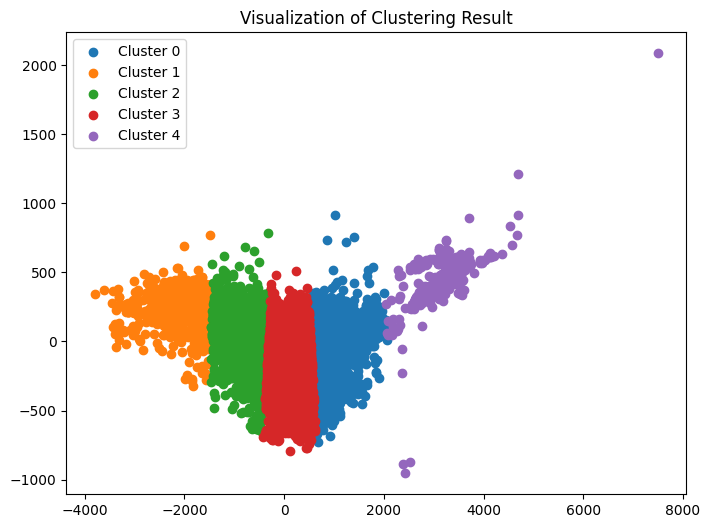

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## (a) PCA with output dim = 10
pca = PCA(n_components=10)
pca.fit(X_train_2d)
X_train_pca2 = pca.transform(X_train_2d)

## (b) k-means on PCA-transformed X_train with K=5
num_cluster = 5
max_iter = 10000
kmeans = KMeans(n_clusters = num_cluster, max_iter=max_iter)
cluster_labels = kmeans.fit_predict(X_train_pca2)

## (c) visualize clustering result
plt.figure(figsize=(8, 6))
unique_clus_labels = np.unique(cluster_labels)

for cluster_label in unique_clus_labels:
    cluster_data = X_train_pca2[cluster_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')

plt.legend()
plt.title('Visualization of Clustering Result')
plt.show()